# GRIP : The Sparks Foundation

# Data Science and Buisness Analytics Intern

# Author : Akash Rai

# Task 1 : Prediction Using Supervised ML

 **In this task we have to predict the percentage score of a student based on the number of hours they studied.**

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
df = pd.read_csv('Students')

**Exploring Data**

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


**Data Visualization**

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

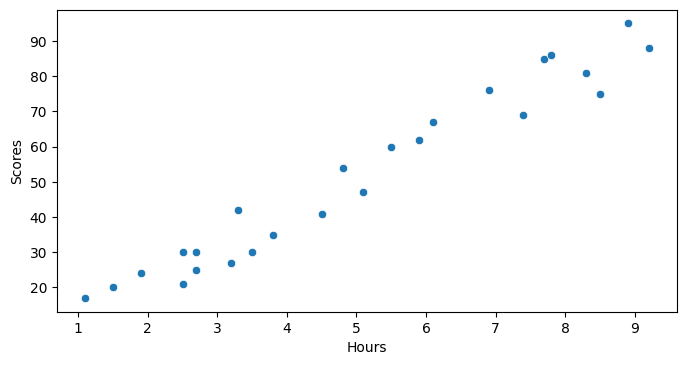

In [8]:
plt.figure(figsize=(8,4),dpi=100)
sns.scatterplot(data=df,x='Hours',y='Scores')

**Distribution plot of two variables and we can see that there is no outliers in the variable**

c:\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

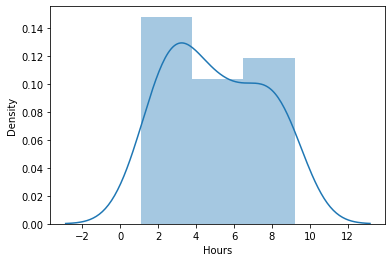

In [9]:
sns.distplot(df.Hours)

c:\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

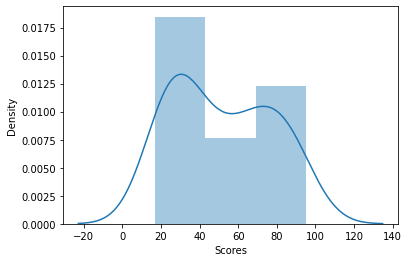

In [10]:
sns.distplot(df.Scores)

# Linear Regression:

In [11]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [12]:
import sklearn
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [14]:
len(df)

25

In [15]:
len(X_train)

20

In [16]:
len(X_test)

5

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train,y_train) 

LinearRegression()

In [20]:
print("Training Complete")

Training Complete


In [21]:
m = model.coef_
c = model.intercept_

In [22]:
m

array([9.73330705])

In [23]:
c

2.5121292983200902

In [24]:
# equation of line y = mx + c
line = m*X + c

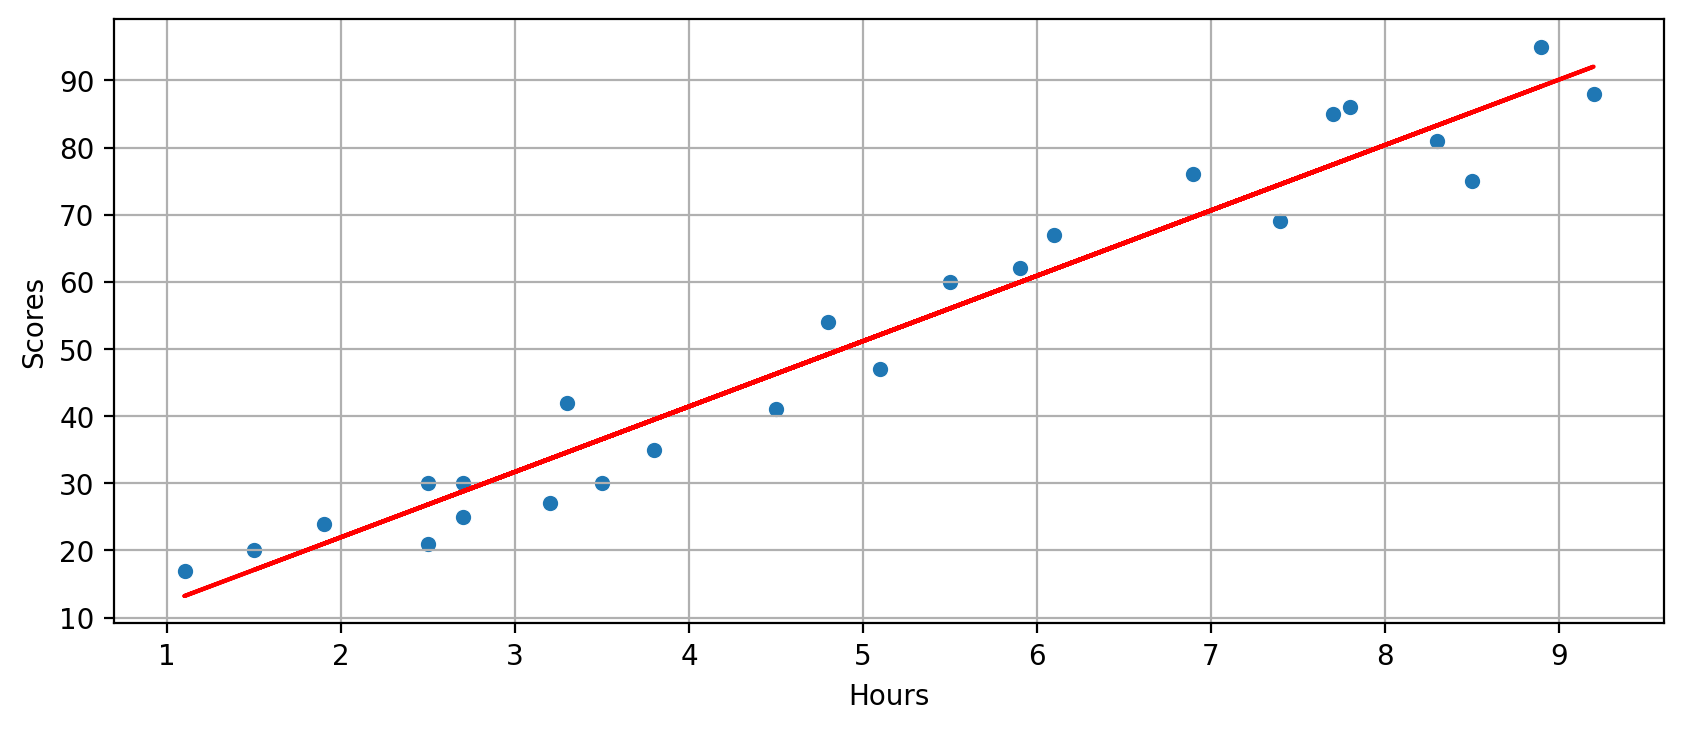

In [25]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='Hours',y='Scores')
plt.plot(X,line,color='red')
plt.grid()

**Predicting our model**

In [26]:
print(X_test)
y_pred = model.predict(X_test)

[[2.5]
 [7.7]
 [3.8]
 [7.4]
 [5.5]]


In [27]:
df = pd.DataFrame({'Actual' : y_test , 'Predicted':y_pred})

In [28]:
df

,Actual,Predicted
0,30,26.845397
1,85,77.458594
2,35,39.498696
3,69,74.538601
4,60,56.045318


**What would be the predicted score if a student studies for 9.25 hours per day ?**

In [29]:
Hours = [[9.25]]
test_pred = model.predict(Hours)

In [30]:
print("No of Hours = {}".format(Hours))
print("Predicted Score ={}".format(test_pred))

No of Hours = [[9.25]]
Predicted Score =[92.54521954]


**Model Evaluation**

In [31]:
from sklearn import metrics 
from sklearn.metrics import r2_score

In [32]:
print('Mean Absolute Error : ' ,metrics.mean_absolute_error(y_test,y_pred))
print('R2 Score :',r2_score(y_test,y_pred))

Mean Absolute Error :  4.937597792467706
R2 Score : 0.9377551740781869
